# **Lab 2: Data Splitting**


## Exercise 1: MSE & MAE

We are going to use a dataset from The World Bank organisation which contains some keys indicators on Australia (https://data.worldbank.org/country/AU).

The dataset can be dowloaded from here: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab01/ex2/WorldBank_OpenData_Australia.csv

We will build a Lasso and a Ridge models that will predict the "GDP" in Australia.

---
### 0. Setup Environment

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
LAB = "lab02"
EXE = "ex01"
DATA = "data"

lab_path = f"{COURSE}/labs/{LAB}/{EXE}"
root_path = "./"

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("###### Install required Python packages ######")
    ! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

    print("\n###### Connect to personal Google Drive ######")
    drive.mount("/content/gdrive")

    root_path = "/content/gdrive/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = f"{root_path}/{lab_path}/"
root_path = Path(folder_path)
root_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in:")
%cd {folder_path}


###### Install required Python packages ######

###### Connect to personal Google Drive ######
Mounted at /content/gdrive

###### Setting up folders ######

You can now save your data files in:
/content/gdrive/MyDrive/36106/labs/lab02/ex01


### 1. Load and Explore Dataset

**[1.1]** Import the pandas package

In [ ]:
import pandas as pd

**[1.2]** Create a variable called `file_url` containing the link to the CSV file

In [ ]:
file_url = 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab01/ex2/WorldBank_OpenData_Australia.csv'

**[1.3]** Load the data into a DataFrame called `df`

In [ ]:
df = pd.read_csv(file_url)

**[1.4]** Display the first 5 rows of `df`

In [ ]:
df.head(5)

,Year,Population,Life_expectancy,Urban_population,CO2,Land_area,GDP,Gross_savings,Interest_rate
0,1960,10276477,70.817073,54.199946,88202.351,7682300.0,18577668272,31.185194,NaN
1,1961,10483000,70.973171,54.615272,90589.568,7682300.0,19652816665,30.635970,2.207440
2,1962,10742000,70.942439,54.662232,94912.961,7682300.0,19892485161,28.926923,5.579625
3,1963,10950000,70.911707,54.998932,101029.517,7682300.0,21507447643,29.920850,3.273874
4,1964,11167000,70.880976,55.317928,108979.573,7682300.0,23764139321,31.226731,1.731211


**[1.5]** Display the last 5 rows of `df`

In [ ]:
df.tail(5)

,Year,Population,Life_expectancy,Urban_population,CO2,Land_area,GDP,Gross_savings,Interest_rate
54,2014,23475686,82.30000,60.037892,361261.839,7682300.0,1467483705132,26.318055,4.405249
55,2015,23815995,82.40000,60.317295,NaN,7692020.0,1351693984525,24.746015,6.158503
56,2016,24190907,82.44878,60.526453,NaN,7692020.0,1208846993740,23.096511,5.985742
57,2017,24601860,82.50000,60.663125,NaN,7692020.0,1330135756844,24.687193,1.450511
58,2018,24982688,82.74878,60.891618,NaN,NaN,1433904348500,24.907994,3.303624


**[1.6]** Display the dimensions (shape) of `df`

In [ ]:
df.shape

(59, 9)

**[1.7]** Display the descriptive statistics of `df`


In [ ]:
df.describe()

,Year,Population,Life_expectancy,Urban_population,CO2,Land_area,GDP,Gross_savings,Interest_rate
count,59.000000,5.900000e+01,59.000000,59.000000,55.000000,5.800000e+01,5.900000e+01,59.000000,58.000000
mean,1989.000000,1.696346e+07,76.502770,59.992123,247789.324255,7.682803e+06,4.351255e+11,26.662081,3.524808
std,17.175564,4.115423e+06,4.147860,2.307851,93643.285206,2.171485e+03,4.704365e+11,2.827767,3.427110
min,1960.000000,1.027648e+07,70.817073,54.199946,88202.351000,7.682300e+06,1.857767e+10,22.024903,-6.020115
25%,1974.500000,1.380800e+07,72.430732,58.937017,171674.272000,7.682300e+06,9.300090e+10,24.547023,1.509515
50%,1989.000000,1.681440e+07,76.713659,60.663125,256106.947000,7.682300e+06,2.992680e+11,25.927187,3.319073
75%,2003.500000,2.001140e+07,80.364634,61.534600,327393.427000,7.682300e+06,5.394892e+11,28.524452,6.129231
max,2018.000000,2.498269e+07,82.748780,63.458994,394792.887000,7.692020e+06,1.576184e+12,32.674826,10.070837


**[1.8]** Display the summary (info) of `df`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              59 non-null     int64  
 1   Population        59 non-null     int64  
 2   Life_expectancy   59 non-null     float64
 3   Urban_population  59 non-null     float64
 4   CO2               55 non-null     float64
 5   Land_area         58 non-null     float64
 6   GDP               59 non-null     int64  
 7   Gross_savings     59 non-null     float64
 8   Interest_rate     58 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 4.3 KB


### 2. Prepare Data

**[2.1]** Remove all missing values from the data

Note: If you are stuck in previous steps, you can dowload the content of df_cleaned here: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab01/ex2/WorldBank_OpenData_Australia.csv


In [ ]:
df_cleaned = df.dropna()

**[2.2]** Display a scatter plot for the target variable against each of `Year`, `Population`, `Life_expectancy`, `CO2`

<Axes: xlabel='CO2', ylabel='GDP'>

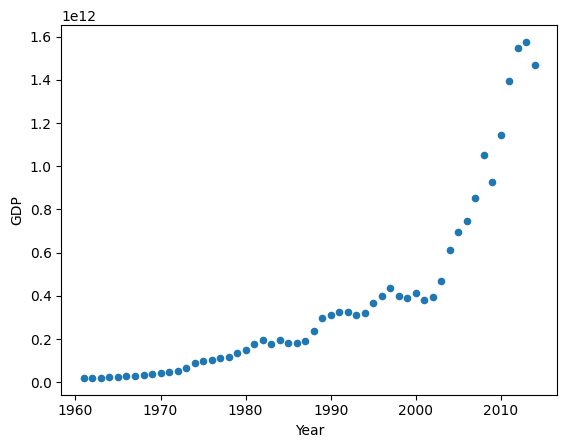

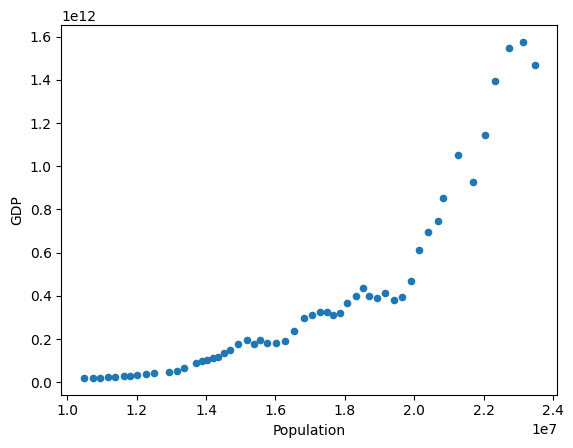

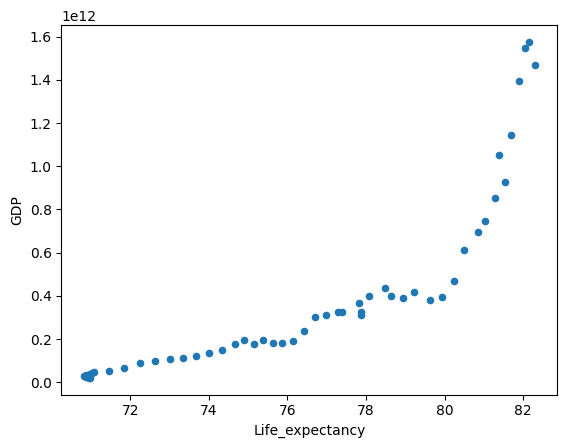

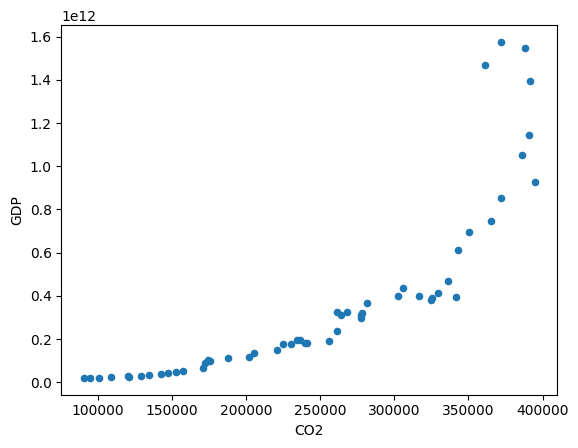

In [ ]:
df_cleaned.plot(x='Year', y='GDP', kind='scatter')
df_cleaned.plot(x='Population', y='GDP', kind='scatter')
df_cleaned.plot(x='Life_expectancy', y='GDP', kind='scatter')
df_cleaned.plot(x='CO2', y='GDP', kind='scatter')

**[2.3]** Display a scatter plot for the target variable against each of `Urban_population`, `Gross_savings` and `Interest_rate`

<Axes: xlabel='Interest_rate', ylabel='GDP'>

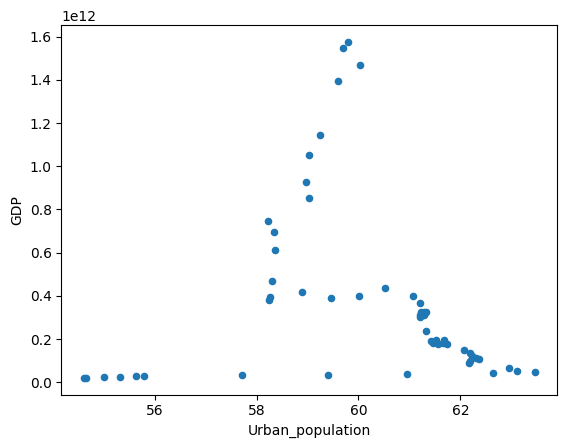

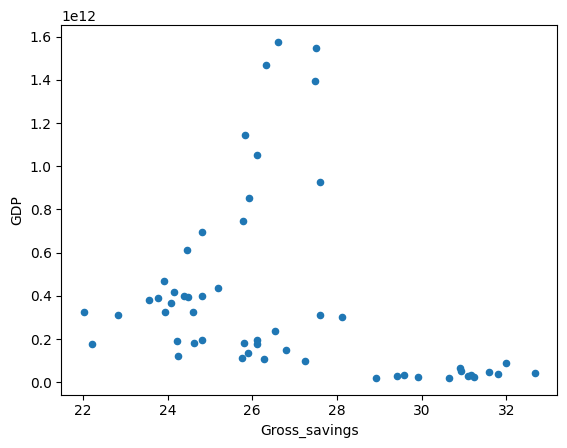

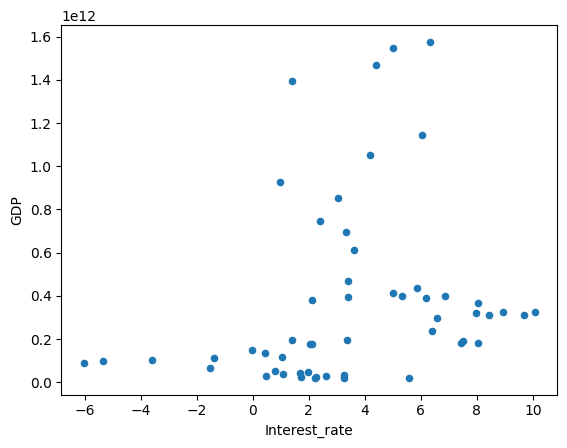

In [ ]:
df_cleaned.plot(x='Urban_population', y='GDP', kind='scatter')
df_cleaned.plot(x='Gross_savings', y='GDP', kind='scatter')
df_cleaned.plot(x='Interest_rate', y='GDP', kind='scatter')

**[2.4]** Display a scatter plot for the target variable against `Land Area`

<Axes: xlabel='Land_area', ylabel='GDP'>

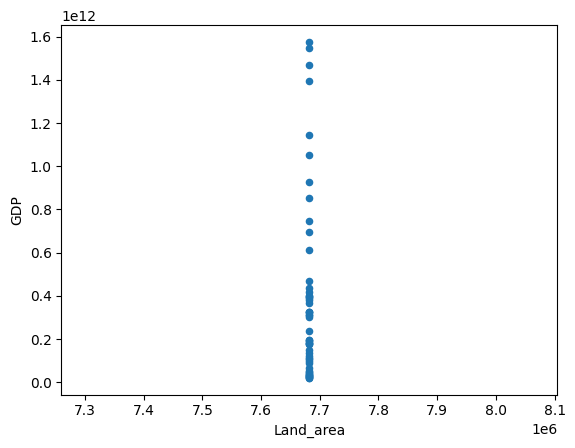

In [ ]:
df_cleaned.plot(x='Land_area', y='GDP', kind='scatter')

### 3 . Split Datasets

**[3.1]** Extract the target variable and save it into a variable called `y`

In [ ]:
y = df_cleaned['GDP']

**[3.2]** Create a copy of `df_cleaned` and save it into a variable called `X`

In [ ]:
X = df_cleaned.copy()

### 4.   Assess Baseline

**[4.1]** Import the DummyRegressor module from sklearn

In [ ]:
from sklearn.dummy import DummyRegressor

**[4.2]** Instantiate the Dummy class into a variable called `base_reg`

In [ ]:
base_reg = DummyRegressor()

**[4.3]** Fit the model with X and y




In [ ]:
base_reg.fit(X, y)

DummyRegressor()

**[4.4]** Import the RMSE and MAE from sklearn

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**[4.5]** Calculate the RMSE and MAE between the target variable and the predictions

In [ ]:
y_pred = base_reg.predict(X)
# Calculate MSE and then take the square root for RMSE
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 413641316887.3311
MAE: 301618194423.7098


### 5. Train Initial Model

**[5.1]** Import the Lasso module from sklearn

In [ ]:
from sklearn.linear_model import Lasso

**[5.2]** Instantiate the Lasso class into a variable called `reg1`

In [ ]:
reg1 = Lasso(alpha=0.1)

**[5.3]** Fit the model with the following features: `Year`, `Population`, `Life_expectancy`, `CO2`

In [ ]:
features = ['Year', 'Population', 'Life_expectancy', 'CO2']
X_selected = X[features]
reg1.fit(X_selected, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.607e+23, tolerance: 9.239e+20
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

**[5.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [ ]:
y_pred = reg1.predict(X_selected)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

mae = mean_absolute_error(y, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 98253316851.94057
MAE: 79424660713.7338


**[5.5]** Import the altair package

In [ ]:
import altair as alt

**[5.6]** Create a line chart with y as both x and y axes

In [ ]:
alt.Chart(pd.DataFrame({'GDP': y})).mark_line().encode(
    x='GDP',
    y='GDP'
).properties(
    title='Perfect Prediction'
)

alt.Chart(...)

**[5.6]** Create a line chart with `y` as the x-axis and `y_preds` as y-axis and combine it with previous chart

In [ ]:
import pandas as pd


chart1 = alt.Chart(pd.DataFrame({'GDP': y})).mark_line(color='blue').encode(
    x='GDP',
    y='GDP'
).properties(
    title='Perfect Prediction'
)


chart2 = alt.Chart(pd.DataFrame({'GDP': y, 'Predictions': y_pred})).mark_line(color='red').encode(
    x='GDP',
    y='Predictions'
)


chart1 + chart2

alt.LayerChart(...)

### 6. Train Second Model

**[6.1]** Task: Create a variable called `X7` containing the following features: `Year`,`Population`,`Life_expectancy`,`CO2`,`Urban_population`,`Interest_rate`,`Gross_savings`

In [ ]:
X7 = X[['Year', 'Population', 'Life_expectancy', 'CO2', 'Urban_population', 'Interest_rate', 'Gross_savings']]

**[6.2]** Task: Instantiate a LinearRegression model and fit with `X7`

In [ ]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

reg2.fit(X7, y)

LinearRegression()

**[6.3]** Task: Display the RMSE and MAE scores of this model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_reg2 = reg2.predict(X7)

mse_reg2 = mean_squared_error(y, y_pred_reg2)
rmse_reg2 = mse_reg2**0.5

mae_reg2 = mean_absolute_error(y, y_pred_reg2)

print(f"RMSE for reg2: {rmse_reg2}")
print(f"MAE for reg2: {mae_reg2}")

RMSE for reg2: 79367048365.32306
MAE for reg2: 63546880780.59491


**[6.4]** Create a line chart with `y` as the x-axis and `y_preds` as y-axis and combine it with the perfect chart

In [ ]:
import altair as alt
import pandas as pd


chart1 = alt.Chart(pd.DataFrame({'GDP': y})).mark_line(color='blue').encode(
    x='GDP',
    y='GDP'
).properties(
    title='Perfect Prediction'
)


chart2 = alt.Chart(pd.DataFrame({'GDP': y, 'Predictions': y_pred_reg2})).mark_line(color='red').encode(
    x='GDP',
    y='Predictions'
)


chart1 + chart2

alt.LayerChart(...)